In [1]:
# 6.1.4

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Create a practice set of random latitude and longitude combinations

lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]

lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]

lat_lngs = zip(lats, lngs)

In [3]:
# Unpack the lat_lngs zip object into a list

# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations

# ***TUPLE CAN ONLY BE UNZIPPED ONCE***

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# 6.1.5 Generate Random World Cities

# Use the citipy module to determine city based on latitude and longitude

from citipy import citipy 

In [7]:
# Use the print() function to display the latitude and longitude combinations

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [8]:
from citipy import citipy

# Create a list for holding the cities

cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [9]:
# 6.2.3 Make an API Call
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff28c9464a46cc3baf5ebf58252b7a73


In [11]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff28c9464a46cc3baf5ebf58252b7a73&q=Boston


In [12]:
# 6.2.4 Retrieve a Response using the get()method 

# Make a 'Get' request for the city weather.

city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Create an endpoint URL for a city

city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [14]:
# Get Data from a Response

# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [15]:
#Get the text of the 'Get' request

city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":74.7,"feels_like":74.44,"temp_min":69.69,"temp_max":77.45,"pressure":1013,"humidity":55},"visibility":10000,"wind":{"speed":12.66,"deg":20},"clouds":{"all":40},"dt":1657153682,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1657098837,"sunset":1657153420},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [16]:
# Get the JSON text for the 'Get' request

city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 74.7,
  'feels_like': 74.44,
  'temp_min': 69.69,
  'temp_max': 77.45,
  'pressure': 1013,
  'humidity': 55},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 20},
 'clouds': {'all': 40},
 'dt': 1657153682,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1657098837,
  'sunset': 1657153420},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Handle Request Errors
# Create an endpoint URL for a city

city_url = url + "&q=" + "Boston"

city_weather = requests.get(city_url)

if city_weather.status_code == 200:
    print(f"City Weather found.")
    
else:
    print(f"City weather not found.")

City Weather found.


In [18]:
# Create an endpoint URL for a city

city_url = url + "&q=" + "Bston"

city_weather = requests.get(city_url)

if city_weather.status_code ==200:
    print(f"City Weather Found.")
    
else:
    print(f"City Weather not found.")

City Weather not found.


In [19]:
# 6.2.5 Parse a Response from an API
# Create an endpoint URL for a city

city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 74.7,
  'feels_like': 74.44,
  'temp_min': 69.69,
  'temp_max': 77.45,
  'pressure': 1013,
  'humidity': 55},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 20},
 'clouds': {'all': 40},
 'dt': 1657153682,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1657098837,
  'sunset': 1657153420},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [20]:
# Get the JSON data

boston_data = city_weather.json()

In [21]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1657098837,
 'sunset': 1657153420}

In [22]:
boston_data["sys"]["country"]

'US'

In [23]:
boston_data["dt"]

1657153682

In [24]:
# Getting time of day, latitude,longitude,max temp,humidity, %cloudiness & wind speed

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 77.45 55 40 12.66


In [25]:
# Convert the Date Timestamp
# Coordinated Universal Time(UTC) or Greenwhich Mean Time(GMT)
boston_data["dt"]

1657153682

In [26]:
# ISO Format

# Import the datetime module from the datetime library

from datetime import datetime

# Get the date from the JSON file

date = boston_data["dt"]

# Convert the UTC date to a date format with year,month,day,hours,minutes and seconds

datetime.utcfromtimestamp(date)

datetime.datetime(2022, 7, 7, 0, 28, 2)

In [27]:
# Convert datetime to python string format
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-07 00:28:02'

In [28]:
# 6.2.6 Get the City Weather Data
# Import the dependencies, and Initialize an Empty List and Counters

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [29]:
# Create an empty list to hold the weather data

city_data =[]

# Print the beginning of the logging

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create the counters

record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ketchikan
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | yerbogachen
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | sur
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | kapoeta
Processing Record 20 of Set 1 | port hueneme
Processing Record 21 of Set 1 | saint anthony
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 | iranduba

Processing Record 35 of Set 4 | longyearbyen
Processing Record 36 of Set 4 | alvinopolis
Processing Record 37 of Set 4 | bilibino
Processing Record 38 of Set 4 | umm kaddadah
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | bethel
Processing Record 41 of Set 4 | marsa matruh
Processing Record 42 of Set 4 | meulaboh
Processing Record 43 of Set 4 | ramasukha
City not found. Skipping...
Processing Record 44 of Set 4 | meyungs
City not found. Skipping...
Processing Record 45 of Set 4 | gushikawa
Processing Record 46 of Set 4 | chengde
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | severobaykalsk
Processing Record 49 of Set 4 | pangnirtung
Processing Record 50 of Set 4 | salalah
Processing Record 1 of Set 5 | kibala
Processing Record 2 of Set 5 | mareeba
Processing Record 3 of Set 5 | urusha
Processing Record 4 of Set 5 | scottsburgh
City not found. Skipping...
Processing Record 5 of Set 5 | mindelo
Processing Record 6 of Set 5 | karratha

Processing Record 25 of Set 8 | luwuk
Processing Record 26 of Set 8 | fernie
Processing Record 27 of Set 8 | port augusta
Processing Record 28 of Set 8 | kodiak
Processing Record 29 of Set 8 | suao
City not found. Skipping...
Processing Record 30 of Set 8 | naze
Processing Record 31 of Set 8 | uray
Processing Record 32 of Set 8 | lukovetskiy
Processing Record 33 of Set 8 | egvekinot
Processing Record 34 of Set 8 | taltal
Processing Record 35 of Set 8 | krasnaya gora
Processing Record 36 of Set 8 | sharjah
Processing Record 37 of Set 8 | bambous virieux
Processing Record 38 of Set 8 | brae
Processing Record 39 of Set 8 | chicama
Processing Record 40 of Set 8 | adilabad
Processing Record 41 of Set 8 | flin flon
Processing Record 42 of Set 8 | solnechnyy
Processing Record 43 of Set 8 | shalinskoye
Processing Record 44 of Set 8 | iquitos
Processing Record 45 of Set 8 | lokosovo
Processing Record 46 of Set 8 | tezu
Processing Record 47 of Set 8 | fortuna
Processing Record 48 of Set 8 | sant

Processing Record 11 of Set 12 | odweyne
Processing Record 12 of Set 12 | adre
Processing Record 13 of Set 12 | maragogi
Processing Record 14 of Set 12 | graciano sanchez
Processing Record 15 of Set 12 | jiuquan
Processing Record 16 of Set 12 | tongren
Processing Record 17 of Set 12 | hambantota
Processing Record 18 of Set 12 | qidong
Processing Record 19 of Set 12 | inuvik
Processing Record 20 of Set 12 | waingapu
Processing Record 21 of Set 12 | tevriz
Processing Record 22 of Set 12 | sitka
Processing Record 23 of Set 12 | puerto parra
Processing Record 24 of Set 12 | nara
Processing Record 25 of Set 12 | kruisfontein
Processing Record 26 of Set 12 | haines junction
Processing Record 27 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 28 of Set 12 | muros
Processing Record 29 of Set 12 | mirabad
Processing Record 30 of Set 12 | moroto
Processing Record 31 of Set 12 | bosobolo
Processing Record 32 of Set 12 | mocuba
Processing Record 33 of Set 12 | punta alta
Process

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,53.22,75,70,4.00,AU,2022-07-07 00:29:40
1,Bredasdorp,-34.5322,20.0403,47.39,83,57,4.90,ZA,2022-07-07 00:29:40
2,Rikitea,-23.1203,-134.9692,75.18,69,10,17.18,PF,2022-07-07 00:29:41
3,Kapaa,22.0752,-159.3190,84.18,69,20,14.97,US,2022-07-07 00:29:41
4,Mataura,-46.1927,168.8643,46.47,72,100,2.71,NZ,2022-07-07 00:29:41
5,Nikolskoye,59.7035,30.7861,61.81,86,100,2.86,RU,2022-07-07 00:29:42
6,East London,-33.0153,27.9116,59.49,80,4,10.09,ZA,2022-07-07 00:29:42
7,Qaanaaq,77.4840,-69.3632,39.72,96,100,1.10,GL,2022-07-07 00:29:42
8,Ushuaia,-54.8000,-68.3000,28.06,74,0,4.61,AR,2022-07-07 00:29:43
9,Busselton,-33.6500,115.3333,48.76,88,86,10.31,AU,2022-07-07 00:29:43


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# 6.3.1 Get Data for Plotting

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [37]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657155030.0131123

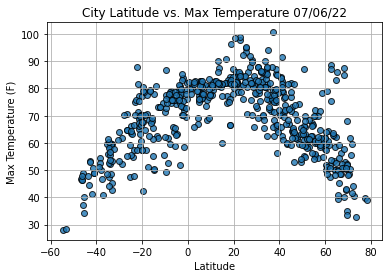

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [39]:
# 6.3.1
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
# Import the time module

import time

# Get today's date in seconds

today = time.time()
today

1657155218.092988